<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Longest_String_Chain_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Longest String Chain

Given a list of strings, write a function that returns the longest string chain that can be built from those strings.

A string chain is defined as follows: let string `A` be a string in the initial array; if removing any single character from string `A` yields a new string `B` that's contained in the initial array of strings, then strings `A` and `B` form a string chain of length 2. Similarly, if removing any single character from string` B` yields a new string `C` that's contained in the initial array of strings, then strings `A`, `B`, and `C` form a string chain of length 3.

The function should return the string chain in descending order (i.e., from the longest string to the shortest one). Note that string chains of length 1 don't exist; if the list of strings doesn't contain any string chain formed by two or more strings, the function should return an empty array.

You can assume that there will only be one longest string chain.

Sample Input

```
strings = ["abde", "abc", "abd", "abcde", "ade", "ae", "1abde", "abcdef"]
```



Sample Output

```
["abcdef", "abcde", "abde", "ade", "ae"]
```



In [ ]:
# Time = O(nm^2 + nlog n)
# Space = O(nm)
# n = length of array
# m = length of longest string

def longestStringChain(strings):
  string_chains = {}
  for string in strings:
    # S = O(n*m)
    string_chains[string] = {'next_string': '', 'max_chain_length': 1}
  # T O(nlog n)
  sorted_strings = sorted(strings, key = len)
  # T O(n)
  for string in sorted_strings:
    find_longest_string_chain(string, string_chains)
  return build_longest_string_chain(sorted_strings, string_chains)

def find_longest_string_chain(string, string_chains):
  # T O(m)
  for i in range(len(string)):
    # T O(m)
    smaller_string = get_smaller_string(string, i)
    if smaller_string not in string_chains:
      continue
    updated_chain_length = string_chains[smaller_string]['max_chain_length'] + 1
    current_chain_length = string_chains[string]['max_chain_length']
    if updated_chain_length > current_chain_length:
      string_chains[string]['max_chain_length'] = updated_chain_length
      string_chains[string]['next_string'] = smaller_string

def get_smaller_string(string, idx):
  return string[:idx] + string[idx + 1:]

def build_longest_string_chain(strings, string_chains):
  max_chain_lenth = 0
  starting_string = ''
  for string in strings:
    if string_chains[string]['max_chain_length'] > max_chain_lenth:
      max_chain_lenth = string_chains[string]['max_chain_length']
      starting_string = string
  
  longest_string_chain = []
  current_string = starting_string
  while current_string != '':
    longest_string_chain.append(current_string)
    current_string = string_chains[current_string]['next_string']

  return [] if len(longest_string_chain) <= 1 else longest_string_chain

In [ ]:
strings = ["abde", "abc", "abd", "abcde", "ade", "ae", "1abde", "abcdef"]
longestStringChain(strings)

['abcdef', 'abcde', 'abde', 'ade', 'ae']

In [ ]:
strings = ["f"]
longestStringChain(strings)

[]

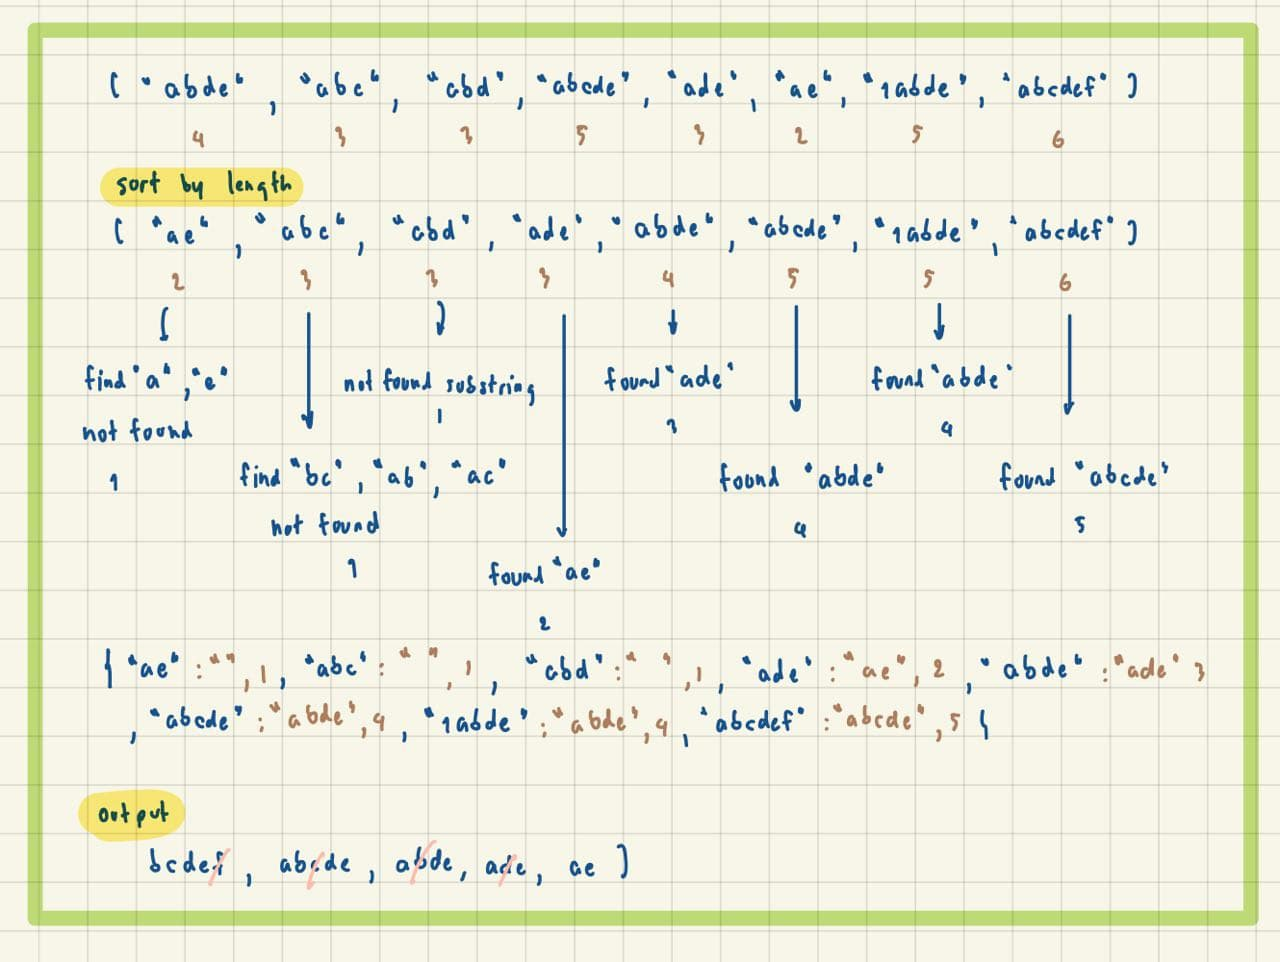

